In [1]:
!pip install tqdm
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

Hello... Good morning!
use_gpu = 0
import numpy as np
Importing python packages was done.
time = 80017176700
Zernike functions are defined.
Current Time = 18:58:43
Wall time: 1.83 s


Plots of Radial Poolynomial
Current Time = 18:58:46


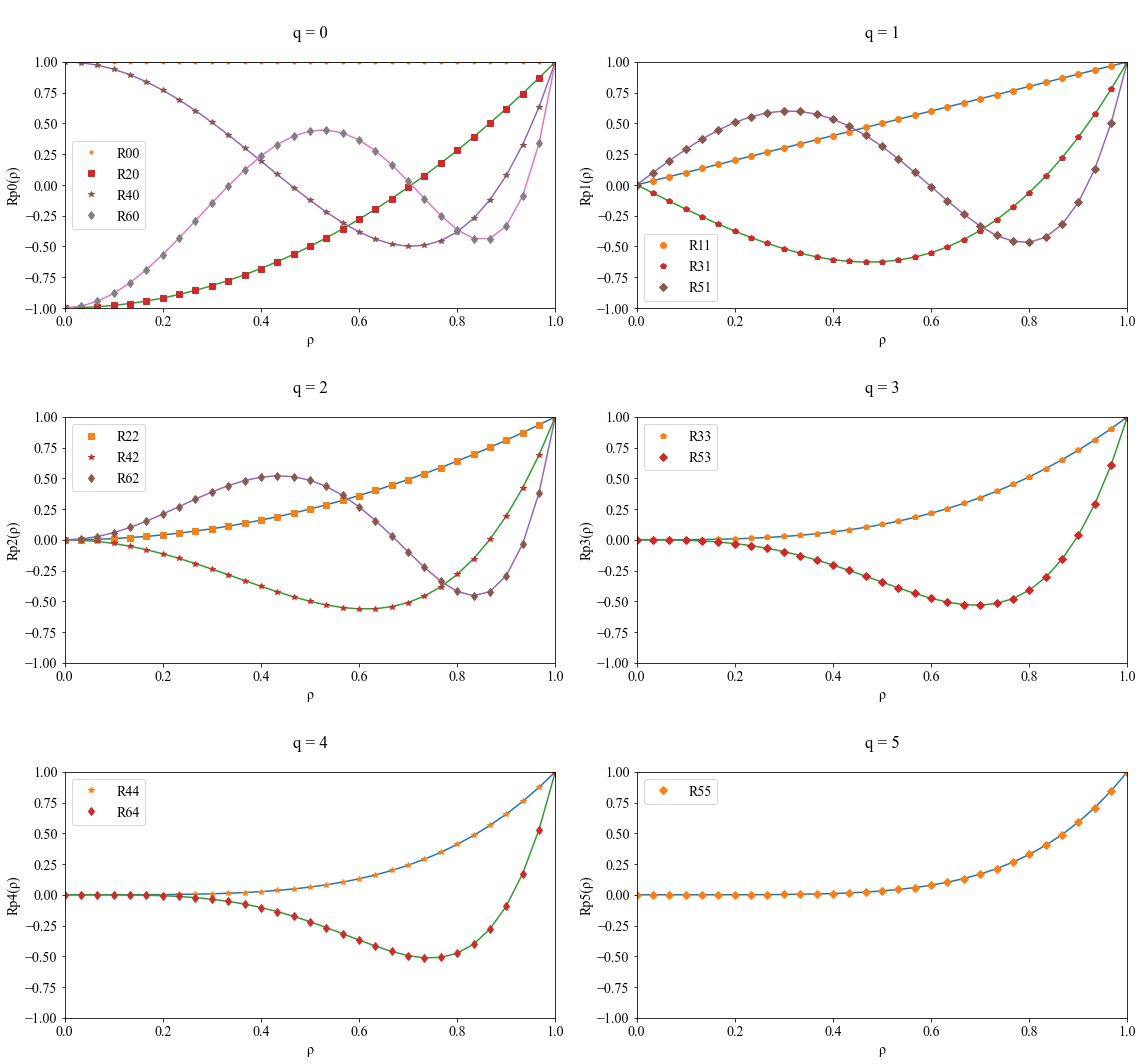

Done.
Wall time: 815 ms


In [2]:
%%time
clear_output()

print( "Plots of Radial Poolynomial" )
print_curr_time()

debug = 0

datas = []

datas.append( { "order" : (0, 0), "coeffs" : [1] })
datas.append( { "order" : (1, 1), "coeffs" : [1] })
datas.append( { "order" : (2, 0), "coeffs" : [2, -1] })
datas.append( { "order" : (2, 2), "coeffs" : [1] })

datas.append( { "order" : (3, 1), "coeffs" : [3, -2] })
datas.append( { "order" : (3, 3), "coeffs" : [1] })

datas.append( { "order" : (4, 0), "coeffs" : [6, -6, 1] })
datas.append( { "order" : (4, 2), "coeffs" : [4, -3] })
datas.append( { "order" : (4, 4), "coeffs" : [1] })

datas.append( { "order" : (5, 1), "coeffs" : [10, -12, 3] })
datas.append( { "order" : (5, 3), "coeffs" : [5, -4] })
datas.append( { "order" : (5, 5), "coeffs" : [1] })

datas.append( { "order" : (6, 0), "coeffs" : [20, -30, 12, -1] })
datas.append( { "order" : (6, 2), "coeffs" : [15, -20, 6] })
datas.append( { "order" : (6, 4), "coeffs" : [6, -5] })
#datas.append( { "order" : (6, 6), "coeffs" : [1] })

#plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"
row_cnt = 3; col_cnt = 2
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.05*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [ charts ]

step = 1/30
rho = np.arange( 0, 1 + step, step )
rho = rho[ np.where( rho <= 1 ) ]

markers = [ ".", "o", "s", "p", "*", "D", "d" ]

hash = {}

for data in datas : 
    order  = data[ "order" ]
    coeffs = data[ "coeffs" ]
    p = order[0] ; q = order[1]
    r_pl_numeric = Rpq( p, q, rho, hash=hash, debug=debug )
    
    r_pl_analytic = np.zeros_like( rho )
    for idx, coeff in enumerate( coeffs ) : 
        r_pl_analytic += coeff*np.power( rho, p - 2*idx )
    pass 

    chart = charts[q]
    chart.plot( rho, r_pl_analytic, linestyle="solid" )
    chart.plot( rho, r_pl_numeric, markers[p], label=f"R{p}{q}" )
    chart.set_xlim(  0, 1 )
    chart.set_ylim( -1, 1 )
    chart.set_xlabel( "ρ" )
    chart.set_ylabel( f"Rp{q}(ρ)" )
    chart.set_title( f"\nq = {q}\n" )
    chart.legend()
    #chart.legend(loc='upper left', bbox_to_anchor=(0.5, 0.1), fancybox=True, shadow=0, ncol=len(datas)//2)
pass

plt.tight_layout(); plt.show()
#print( f"rho = {rho}" )

print( "Done.")

Current Time = 18:59:00
Radial polynomail orthogonality validation


Resolution:   0%|          | 0/6 [00:00<?, ?it/s]


************************************************************
Resolution = 2, T = 6
Elapsed time = 0.006586400000003323
Error avg. = 0.0489777724
Fail count = 72, Good count = 0

************************************************************
Resolution = 3, T = 6
Elapsed time = 0.006497100000004252
Error avg. = 0.0047397869
Fail count = 72, Good count = 0

************************************************************
Resolution = 4, T = 6
Elapsed time = 0.0153839999999974
Error avg. = 0.0004723979
Fail count = 0, Good count = 72

************************************************************
Resolution = 5, T = 6
Elapsed time = 0.1460048999999941
Error avg. = 0.0000472240
Fail count = 0, Good count = 72

************************************************************
Resolution = 6, T = 6
Elapsed time = 2.0783039000000088
Error avg. = 0.0000047222
Fail count = 0, Good count = 72

************************************************************
Resolution = 7, T = 6
Elapsed time = 21.5894581
Error 

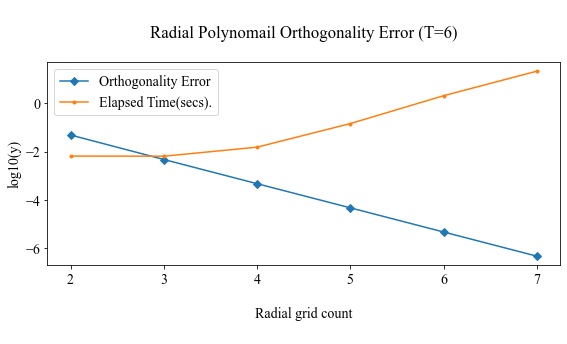

Current Time = 18:59:24

Done
Wall time: 24 s


In [3]:
%%time
clear_output()

print_curr_time()

print( "Radial polynomail orthogonality validation" )

np.set_printoptions(suppress=1)

debug = 1

error_avgs = []
elapsed_list = []

resolutions = [ x for x in range( 2, 7 + 1 ) ]

T = 6 #10 # 20 

for resolution in tqdm( resolutions, desc="Resolution" ):
    if debug : 
        print( line2 )
        print( f"Resolution = {resolution}, T = {T}" )
    pass
    
    then = perf_counter() 

    dr = 1/(10**resolution)

    rho = np.arange( 0, 1 + dr, dr ) 
    rho = rho[ np.where( rho <= 1 ) ]

    # debug and print( f"rho = {rho}" )

    good_cnt = 0 
    fail_cnt = 0 

    error_sum = 0
    
    hash= {}

    for p in range( 0, T + 1 ) :
        for q in range( 0, T + 1 ) :
            for l in range( -q, q + 1 ) :
                if abs(l) > p or abs(l) > q:
                    continue ;
                elif ( p - abs(l) )%2 == 1 :
                    continue
                elif ( q - abs(l) )%2 == 1 :
                    continue
                pass
            
                r_pl = Rpq( p, l, rho, hash=hash, debug=0 )
                r_ql = Rpq( q, l, rho, hash=hash, debug=0 )
                
                sum = 0 
                sum = np.sum(r_pl*r_ql*rho*dr)*2*(p + 1)
                
                expect = [0, 1][ p == q ]
                error = abs(expect -sum)
                error_sum += error
                success = error < 1/1_000 
                success_t = 'Good' if success else 'Fail'
                
                good_cnt += success
                fail_cnt += (not success)
                
                #debug and print( f"[{p:02d}][{q:02d}] {success_t} : Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}, exptect = {expect}", flush="True" )
            pass
        pass
    pass

    del hash

    error_avg = error_sum/(good_cnt + fail_cnt)
    error_avgs.append( error_avg )
    
    elapsed = perf_counter() - then
    elapsed_list.append( elapsed )

    if debug : 
        print( f"Elapsed time = { elapsed }" )
        print( f"Error avg. = {error_avg:.10f}" )
        print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
    pass
pass

print( "Plotting .... ", flush="True" )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

resolutions = np.array( resolutions, np.uint8 )
error_avgs = np.log10( np.array( error_avgs ) )
elapsed_list = np.array( elapsed_list )
elapsed_list = np.log10( elapsed_list )

chart.plot( resolutions, error_avgs, marker="D", label="Orthogonality Error" )
chart.plot( resolutions, elapsed_list, marker=".", label="Elapsed Time(secs)." )

chart.set_title( f"\nRadial Polynomail Orthogonality Error (T={T})\n" )
chart.set_xlabel( "\nRadial grid count\n" )
chart.set_ylabel( "log10(y)" )
chart.set_xticks( resolutions ) 
chart.legend()

plt.tight_layout(); plt.show()

print_curr_time()

print( "\nDone")

In [1]:
%%time
from IPython.display import clear_output
# 저니크 다항식 테스트 
clear_output()

from AZernike import *

print_curr_time()

print( "\nZernike polynomail orthogonality validation" )

np.set_printoptions(suppress=1)

debug = 1

error_avgs = []
elapsed_list = []

res_max = 4 #7
resolutions = [ x for x in range( 3, res_max + 1 ) ]

T = 5 #5 #10 # 20 

for resolution in tqdm( resolutions, desc="Resolution" ):
    if debug : 
        print( line2 )
        print( f"Resolution = {resolution}, T = {T}" )
    pass
    
    then = perf_counter() 

    h = 10**resolution
    w = h 
    img = np.ones( (h, w), np.uint8 )
    
    rho, theta, x, y, dx, dy = rho_theta( img )

    good_cnt = 0 
    fail_cnt = 0 

    error_sum = 0
    
    hash= {}

    for p in range( 0, T + 1 ) :
        for q in range( 0, T + 1 ) :
            for l in range( -q, q + 1 ) :
                if abs(l) > p or abs(l) > q:
                    continue ;
                elif ( p - abs(l) )%2 == 1 :
                    continue
                elif ( q - abs(l) )%2 == 1 :
                    continue
                pass
            
                v_pl = Vpq( p, l, rho, theta, hash=hash, debug=0)
                v_ql = Vpq( q, l, rho, theta, hash=hash, debug=0)
                
                sum = np.sum( np.conjugate(v_pl)*v_ql )
                sum = sum*dx*dy*(p+1)/pi
                sum = np.absolute( sum )
                
                #print( f"R = {resolution}, T = {T}, v_pl({p}, {l:3d}) = {v_pl}, v_ql({q}, {l:3d}) = {v_ql}, ", flush=1 )
                
                expect = [0, 1][ p == q ]
                error = abs(expect -sum)
                error_sum += error
                success = error < 1/1_000 
                success_t = 'Good' if success else 'Fail'
                
                good_cnt += success
                fail_cnt += (not success)
                
                debug and print( f"[{p:02d}][{q:02d}] {success_t} : V*pl({p}, {l:2d})*Vql({q}, {l:2d}) = {sum:.4f}, exptect = {expect}, error={error:.4f}", flush=1 )
            pass
        pass
    pass

    del hash

    error_avg = error_sum/(good_cnt + fail_cnt)
    error_avgs.append( error_avg )
    
    elapsed = perf_counter() - then
    elapsed_list.append( elapsed )

    if debug : 
        print()
        print( f"Elapsed time = { elapsed }" )
        print( f"Error avg. = {error_avg:.10f}" )
        print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
    pass
pass

print( "Plotting .... ", flush="True" )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

resolutions = np.array( resolutions, np.uint8 )
error_avgs = np.log10( np.array( error_avgs ) )
elapsed_list = np.array( elapsed_list )
elapsed_list = np.log10( elapsed_list )

chart.plot( resolutions, error_avgs, marker="D", label="Orthogonality Error" )
chart.plot( resolutions, elapsed_list, marker=".", label="Elapsed Time(secs)" )

chart.set_title( f"\nZerinike Polynomail Orthogonality Error (T={T})\n" )
chart.set_xlabel( "\nRadial grid count\n" )
chart.set_ylabel( "log10(y)" )
chart.set_xticks( resolutions ) 
chart.legend()

plt.tight_layout(); plt.show()

print( "\nDone")

print_curr_time()

Hello... Good morning!
use_gpu = 0
import numpy as np
Importing python packages was done.
time = 65597995000
Zernike functions are defined.
Current Time = 19:16:50
Current Time = 19:16:50

Zernike polynomail orthogonality validation


Resolution:   0%|          | 0/2 [00:00<?, ?it/s]


************************************************************
Resolution = 3, T = 5
[00][00] Good : V*pl(0,  0)*Vql(0,  0) = 1.0000, exptect = 1, error=0.0000
[00][02] Fail : V*pl(0,  0)*Vql(2,  0) = 0.3333, exptect = 0, error=0.3333
[00][04] Fail : V*pl(0,  0)*Vql(4,  0) = 0.0667, exptect = 0, error=0.0667
[01][01] Fail : V*pl(1, -1)*Vql(1, -1) = 0.6667, exptect = 1, error=0.3333
[01][01] Fail : V*pl(1,  1)*Vql(1,  1) = 0.6667, exptect = 1, error=0.3333
[01][03] Fail : V*pl(1, -1)*Vql(3, -1) = 0.4000, exptect = 0, error=0.4000
[01][03] Fail : V*pl(1,  1)*Vql(3,  1) = 0.4000, exptect = 0, error=0.4000
[01][05] Fail : V*pl(1, -1)*Vql(5, -1) = 0.0190, exptect = 0, error=0.0190
[01][05] Fail : V*pl(1,  1)*Vql(5,  1) = 0.0190, exptect = 0, error=0.0190
[02][00] Fail : V*pl(2,  0)*Vql(0,  0) = 1.0000, exptect = 0, error=1.0000
[02][02] Fail : V*pl(2, -2)*Vql(2, -2) = 0.4667, exptect = 1, error=0.5333
[02][02] Fail : V*pl(2,  0)*Vql(2,  0) = 0.8667, exptect = 1, error=0.1333
[02][02] Fail : 

MemoryError: Unable to allocate 1.49 GiB for an array with shape (100000000,) and data type complex128

Hello... Good morning!
use_gpu = 0
import numpy as np
Importing python packages was done.
time = 6300301000
Zernike functions are defined.
Current Time = 20:14:25
Current Time = 20:14:25
img shape=  (4, 4)
H = 10, W = 10, r = 6.363961030678928
x =  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
y =  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]
x =  [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.         -1.         -0.77777778
 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333  0.55555556
  0.77777778  1.         -1.         -0.77777778 -0.55555556 -0.33333333
 -0.11111111  0.11111111  0.33333333  0.5

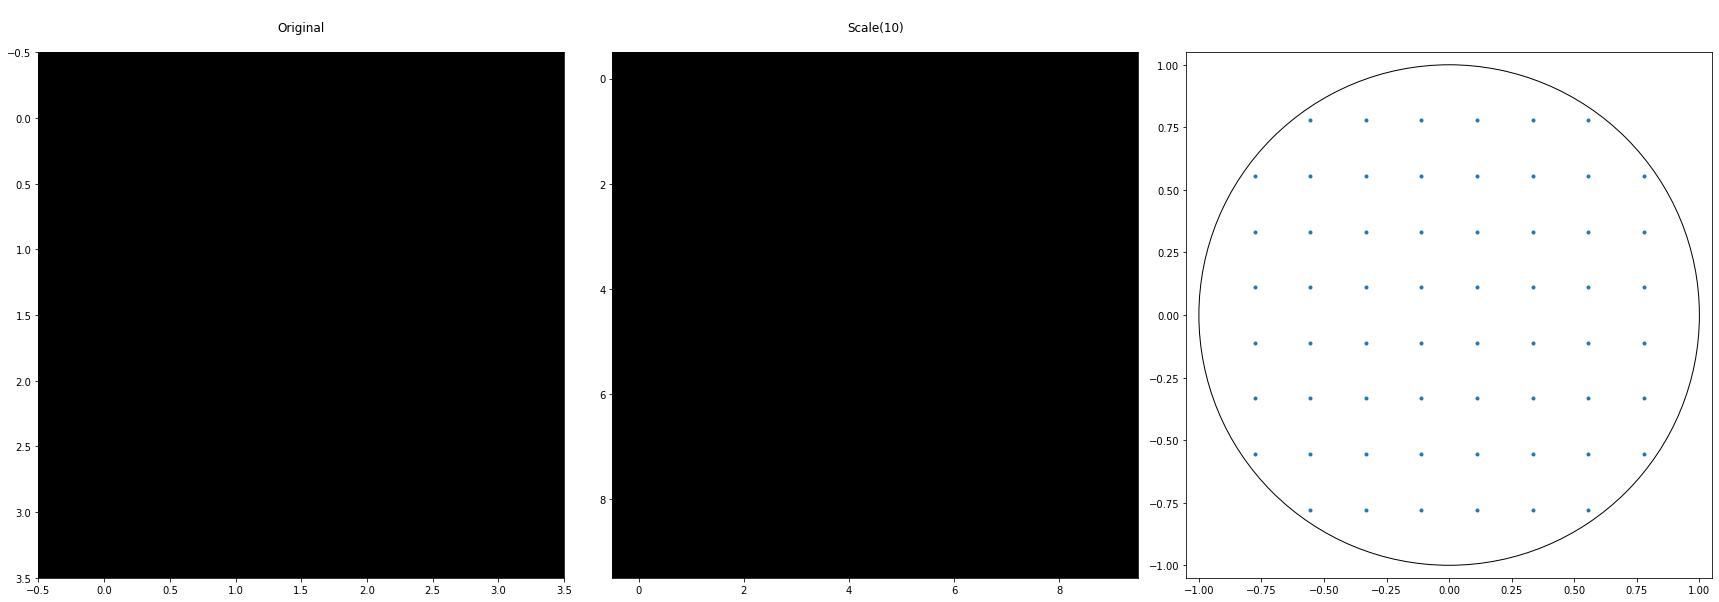

2021-12-04:20:14:25, INFO     [Profiler.py:0085] *** The function[ rho_theta ] Average: 0.004 sec(s), Max: 0.004 sec(s), Call : 1 times. 
2021-12-04:20:14:25, INFO     [Profiler.py:0085] *** The function[       Vpq ] Average: 0.000 sec(s), Max: 0.001 sec(s), Call : 14 times. 
2021-12-04:20:14:25, INFO     [Profiler.py:0085] *** The function[       Rpq ] Average: 0.000 sec(s), Max: 0.000 sec(s), Call : 6 times. 


Current Time = 20:14:25

Done.
Wall time: 1.87 s


In [1]:
%%time
from IPython.display import clear_output
# 저니크 모멘트
clear_output()

from AZernike import *

print_curr_time()

debug = 0

img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 25

if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

if 1 : 
    img = np.ones( (4, 4), np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

K = 10
img = cv.resize( img_org, (K, K), interpolation=cv.INTER_AREA )

img = np.array( img )

rho, theta, x, y, dx, dy = rho_theta( img, debug = debug) 

print( f"x = {x}" )
print( f"y = {y}" )
print( f"rho = {rho}" )
print( f"itemsize = {x.itemsize}" )
print( f"dx = {dx}, dy = {dy}" )

T = 3
print( f"K = {K}, T = {T}" )
hash = {}
for p in range( 0, T + 1 ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( p, q, rho, theta, hash=hash, debug=0 )
            sum = np.sum( v_pq*np.conjugate(v_pq) ) 
            sum = sum*dx*dy*(p + 1)/pi 
            sum = np.absolute( sum )
            print( f"V*_pq x V_pq({p:2d}, {q:3d}) = ", sum )
        pass
    pass
pass

del hash

# 서브 챠트 생성 
idx = 0 
row_cnt = 1; col_cnt = 3
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 8*row_cnt) )
charts = charts.flatten()

t_img = img_org
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( t_img, cmap='gray' )
if 0 : 
    chart.set_xlim( 0 , t_img.shape[1] - 1 )
    chart.set_ylim( 0 , t_img.shape[0] - 1 ) 
    chart.set_yticks( np.arange( 0, t_img.shape[1]))
    chart.set_yticks( np.arange( 0, t_img.shape[0])[::-1])

t_img = img
chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({K})\n" )
chart.imshow( t_img, cmap='gray' )
if 0 : 
    chart.set_xlim( 0 , t_img.shape[1] - 1 )
    chart.set_ylim( 0 , t_img.shape[0] - 1)
    chart.set_yticks( np.arange( 0, t_img.shape[1]))
    chart.set_yticks( np.arange( 0, t_img.shape[0])[::-1])

chart = charts[ idx ] ; idx += 1
chart.set_aspect(1)
chart.set_xlim( -1.05 , 1.05 )
chart.set_ylim( -1.05 , 1.05 )
if 0 : 
    chart.axhline(y=0, color='k')
    chart.axvline(x=0, color='k')

chart.add_artist( plt.Circle((0, 0), 1, fill=0) )
chart.scatter( x, y, marker="." )

plt.tight_layout(); plt.show()

print_profile()

print_curr_time()

print( "\nDone." )